In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as KBackend
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [70]:
train_directory = 'train/'
test_directory = 'test/'

In [71]:
# Reading an image to grab the input shape
hot_dog_images = os.listdir(train_directory + 'hot_dog/')
img = cv2.imread(train_directory + 'hot_dog/' + hot_dog_images[0], 0)
img_shape = img.shape

In [100]:
# Data Generators
datagen = ImageDataGenerator()

# Image Resize Factor
# Note that because my computer only has 4GB RAM - I had to scale the images
# down as I ran out of memory. If you got more memory - feel free to decrease
# the resize factor.

resize_factor = 5

In [101]:
# Script to ensure that the image shape is padded into the input correctly
# Copy and paste this script to make sure
if KBackend.image_data_format() == 'channels_first':
    INPUT_SHAPE = (3,int(img.shape[0] / resize_factor),
        int(img.shape[1] / resize_factor))
else:
    INPUT_SHAPE = (int(img.shape[0] / resize_factor),
        int(img.shape[1] / resize_factor),3)


In [102]:
# This function generates the train generator
train_generator = datagen.flow_from_directory(train_directory,
    target_size=(INPUT_SHAPE[0],INPUT_SHAPE[1]),
    batch_size=16, class_mode='binary')

Found 509 images belonging to 2 classes.


In [103]:
# Specifying the model details. Feel free to edit as appropriate
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 160000)            0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               20480128  
_________________________________________________________________
dropout_27 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 1)                 129       
Total params: 20,482,049
Trainable params: 20,482,049
Non-trainable params: 0
_________________________________________

In [109]:
model.compile(optimizer='adam', loss='binary_crossentropy',
    metrics=['accuracy'])

# Hyperparameters
epochs = 50


In [ ]:

# Fit_generator is now deprecated. Just use fit - we don't need to specify
# steps as it is automated now.
training_history= model.fit(train_generator, epochs=epochs, verbose=1)

  ...
    to  
  ['...']
Train for 32 steps
Epoch 1/50
32/32 [==============================] - 3s 85ms/step - loss: 0.0131 - accuracy: 0.9961
Epoch 2/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0354 - accuracy: 0.9862
Epoch 3/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0499 - accuracy: 0.9823
Epoch 4/50
32/32 [==============================] - 3s 87ms/step - loss: 0.0715 - accuracy: 0.9784
Epoch 5/50
32/32 [==============================] - 3s 88ms/step - loss: 0.0246 - accuracy: 0.9902
Epoch 6/50
32/32 [==============================] - 3s 87ms/step - loss: 0.0146 - accuracy: 1.0000
Epoch 7/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0279 - accuracy: 0.9921
Epoch 8/50
32/32 [==============================] - 3s 86ms/step - loss: 0.0166 - accuracy: 0.9961
Epoch 9/50
32/32 [==============================] - 3s 90ms/step - loss: 0.0281 - accuracy: 0.9941
Epoch 10/50
32/32 [==============================] - 3s 89ms/step

In [111]:

# See what available data we have from the training_history object
print(training_history.history.keys())


dict_keys(['loss', 'accuracy'])


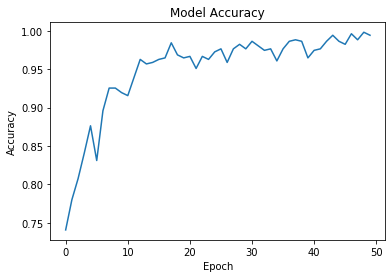

In [112]:
# Plot the accuracy over training
plt.plot(training_history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

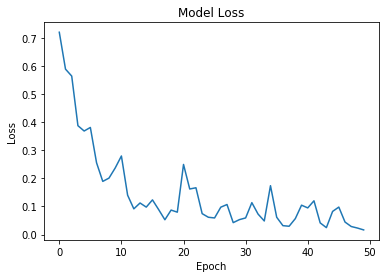

In [113]:

# Plot the loss over training
plt.plot(training_history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()
